In [12]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Step 1: Load the Culane dataset and read in the images along with their corresponding lane marking labels (which have lines).
def load_data(path:str="D:/Data",sample:int = -1):

    images = []
    labels = []
    data_set=[] 
    df = path
    results=[]
    with open(df+"/list/train_gt.txt","r") as f:
        for line in f :
            #line = line.strip()
            data = line.split(" ")
            set1 = data[0].split("/")[1:]
            if(set1[0] == "driver_182_30frame"):
                results.append(data)
    results.sort()
    for data in results :
        exist=[int(x) for x in data[2:]]
        label_sep = data[1].split("/")
        img_path= df+data[0]
        label_path = df+data[1]
        dict_culane={
            "img_path":img_path ,
            "label_path":label_path ,
            "exist":exist 
        }
        data_set.append(dict_culane)
    if sample == -1:
        sample = len(data_set)    
    for img in data_set[:sample]:
        print(data_set.index(img),"\r")
        image = cv2.imread(img["img_path"])
        label = cv2.imread(img["label_path"], cv2.IMREAD_GRAYSCALE)

        images.append(image)
        labels.append(label)

    return np.array(images), np.array(labels),data_set[:sample]

# Step 2: Preprocess the images and labels to a fixed size and format.
def preprocess_data(images, labels, target_size=(256, 256)):
    images = np.array([cv2.resize(img, target_size) for img in images])
    images = images.astype('float32') / 255.0
    labels = np.array([cv2.resize(label, target_size) for label in labels])
    labels = np.where(labels > 0, 1, 0)
    labels = np.expand_dims(labels, axis=-1)
    return images, labels

# Step 3: Split the dataset into training and validation sets.
def split_data(images, labels, test_size=0.2, random_state=42):
    x_train, x_val, y_train, y_val = train_test_split(images, labels, test_size=test_size, random_state=random_state)
    return x_train, x_val, y_train, y_val

In [14]:
images , labels , data_set = load_data(sample=2000)

0 
1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
21 
22 
23 
24 
25 
26 
27 
28 
29 
30 
31 
32 
33 
34 
35 
36 
37 
38 
39 
40 
41 
42 
43 
44 
45 
46 
47 
48 
49 
50 
51 
52 
53 
54 
55 
56 
57 
58 
59 
60 
61 
62 
63 
64 
65 
66 
67 
68 
69 
70 
71 
72 
73 
74 
75 
76 
77 
78 
79 
80 
81 
82 
83 
84 
85 
86 
87 
88 
89 
90 
91 
92 
93 
94 
95 
96 
97 
98 
99 
100 
101 
102 
103 
104 
105 
106 
107 
108 
109 
110 
111 
112 
113 
114 
115 
116 
117 
118 
119 
120 
121 
122 
123 
124 
125 
126 
127 
128 
129 
130 
131 
132 
133 
134 
135 
136 
137 
138 
139 
140 
141 
142 
143 
144 
145 
146 
147 
148 
149 
150 
151 
152 
153 
154 
155 
156 
157 
158 
159 
160 
161 
162 
163 
164 
165 
166 
167 
168 
169 
170 
171 
172 
173 
174 
175 
176 
177 
178 
179 
180 
181 
182 
183 
184 
185 
186 
187 
188 
189 
190 
191 
192 
193 
194 
195 
196 
197 
198 
199 
200 
201 
202 
203 
204 
205 
206 
207 
208 
209 
210 
211 
212 
213 
214 
215 
216 
217 
218 
219 
220 
221 


In [15]:
def preprocess_images(images, target_size=(256, 256)):
    preprocessed_images = np.zeros((len(images), target_size[0], target_size[1], 3))
    
    for i in range(len(images)):
        img = cv2.resize(images[i], target_size)
        img = img.astype('float32') / 255.0
        preprocessed_images[i] = img
    
    return preprocessed_images

In [16]:
pi = preprocess_images(images)

In [19]:
pdi,pdl = preprocess_data(images,labels)

In [18]:
def create_binary_masks(labels):
    binary_masks = []
    for label in labels:
        binary_mask = np.zeros(label.shape[:2], dtype=np.uint8)
        coordinates = np.where(label != [0, 0, 0])
        binary_mask[coordinates[0], coordinates[1]] = 1
        binary_masks.append(binary_mask)
    binary_masks = np.array(binary_masks)
    binary_masks = binary_masks.reshape(binary_masks.shape[0], binary_masks.shape[1], binary_masks.shape[2], 1)
    return binary_masks

In [20]:
bm = create_binary_masks(pdl)

In [21]:
def split_data(images, labels, test_size=0.2, validation_size=0.2, random_state=42):
    # Split into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=test_size, random_state=random_state)
    
    # Split the training set into training and validation sets
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=validation_size, random_state=random_state)
    
    return x_train, x_val, x_test, y_train, y_val, y_test

In [22]:
x_train, x_val, x_test, y_train, y_val, y_test = split_data(pi, bm)


In [30]:
def augment_data(x_train, y_train, batch_size=32):
    datagen = ImageDataGenerator()
    datagen.fit(x_train)
    generator = datagen.flow(x_train, y_train, batch_size=batch_size)   
    return generator

In [31]:
from keras.preprocessing.image import ImageDataGenerator
gen = augment_data(x_train,y_train)

In [32]:
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow(x_val, y_val, batch_size=32, shuffle=False)


In [25]:
def augment_data1(x_train, y_train, batch_size=32):
    # Create an ImageDataGenerator object with data augmentation parameters
    train_datagen = ImageDataGenerator()
        #rotation_range=10, # Rotate the image randomly between 0 and 10 degrees
        #width_shift_range=0.1, # Shift the image horizontally by up to 10% of the image width
        #height_shift_range=0.1, # Shift the image vertically by up to 10% of the image height
        #zoom_range=0.1, # Zoom the image in or out by up to 10%
        #horizontal_flip=True, # Flip the image horizontally
        #fill_mode='nearest' # Fill in any empty pixels with the nearest valu

    # Load the training set and apply data augmentation
    train_generator = train_datagen.flow(
        x_train, # Input images
        y_train, # Binary masks
        batch_size=batch_size,
        shuffle=True # Shuffle the data
    )

    return train_generator

In [26]:
train_gen = augment_data1(x_train,y_train)

NameError: name 'ImageDataGenerator' is not defined

In [2]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

def simple_model(input_shape):
    inputs = Input(shape=input_shape)

    # Encoder
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    # Decoder
    up1 = UpSampling2D(size=(2, 2))(pool2)
    conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1)
    up2 = UpSampling2D(size=(2, 2))(conv3)
    conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(up2)
    outputs = Conv2D(2, (1, 1), activation='softmax', padding='same')(conv4)

    model = Model(inputs=inputs, outputs=outputs)
    return model

In [23]:
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans 
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras import backend as keras
def unet():
    input_size = (256,256,3)
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)
    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)
    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)
    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)
    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)
    model = Model( inputs,conv10)
    model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

#model.save(filepath="../Final/Unet.hdf5")
model=unet()


In [4]:
model = simple_model((256,256,3))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [33]:
history = model.fit(gen, epochs=1, validation_data=val_generator)

ValueError: Creating variables on a non-first call to a function decorated with tf.function.

In [27]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow(x_test, y_test, batch_size=32, shuffle=False)

In [51]:
test_loss, test_accuracy = model.evaluate(test_generator)

print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

13/13 [==============================] - 9s 699ms/step - loss: 0.1334 - accuracy: 0.9884
Test loss: 0.13336652517318726
Test accuracy: 0.9883880615234375


In [52]:
import matplotlib.pyplot as plt

# Load a test image
test_image = cv2.imread('D:/Data/driver_182_30frame/05312336_0004.MP4/00000.jpg')

# Generate lane predictions for the test image
test_image = cv2.resize(test_image, (256, 256))

# Generate lane predictions for the test image
test_pred = model.predict(test_image.reshape(1, 256, 256, 3))

# Convert the predicted binary mask to lane coordinate points
test_points = binary_mask_to_points(test_pred)
print(test_points.__len__())


1/1 [==============================] - 0s 42ms/step


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\copy.cpp:1026: error: (-215:Assertion failed) top >= 0 && bottom >= 0 && left >= 0 && right >= 0 && _src.dims() <= 2 in function 'cv::copyMakeBorder'


TypeError: Invalid shape (1, 256, 256, 2) for image data

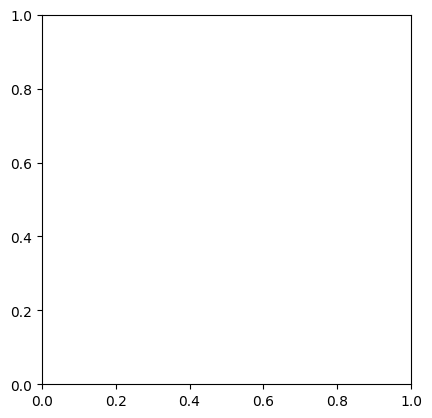

In [54]:
plt.imshow(test_pred)

In [14]:
def binary_mask_to_points(mask):
    # Find the contours of the binary mask
    contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    # Convert the contours to a list of points
    points_list = []
    for contour in contours:
        for point in contour.squeeze():
            x, y = point.tolist()
            points_list.append((x, y))
    
    return np.array(points_list)

In [18]:
def binary_mask_to_points(mask, threshold=0.5):
    # Apply threshold to convert the mask to binary
    mask = (mask > threshold).astype(np.uint8)

    # Initialize an empty list to store the lane coordinate points
    points = []

    # Loop over each row and column in the mask
    for row in range(mask.shape[0]):
        for col in range(mask.shape[1]):
            # Check if the current pixel is part of the lane
            if np.any(mask[row, col]):
                # If so, append the pixel coordinates to the list of points
                points.append([col, row])

    # Convert the list of points to a numpy array
    points = np.array(points)

    return points

In [40]:
def binary_mask_to_points(mask):
    # Initialize an empty list to store the lane points
    points = []
    
    # Iterate over the rows and columns of the binary mask
    for row in range(mask.shape[0]):
        for col in range(mask.shape[1]):
            # If the pixel at the current location is white (i.e., part of the lane)
            if np.any(mask[row, col]):
                # Add the current point to the list of lane points
                points.append([col, row])
    
    # Convert the list of points to a NumPy array and return it
    return np.array(points)

In [49]:
import sys
!{sys.executable} -m pip install scikit-image


Defaulting to user installation because normal site-packages is not writeable


In [ ]:
python.exe -m pip install --upgrade pip

In [ ]:
import tensorflow as tf

if tf.test.gpu_device_name():
    print('GPU device found')
else:
    print("No GPU found")

No GPU found


In [ ]:
tf.device.

In [ ]:
tf.config.list_physical_devices() 

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
CUDNN_PATH=$(dirname $(python -c "import nvidia.cudnn;print(nvidia.cudnn.__file__)"))


SyntaxError: invalid syntax (2942902703.py, line 1)

In [ ]:
tf.debugging.set_log_device_placement(True)


In [1]:
import tensorflow as tf

In [2]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
print(tf.config.experimental.list_physical_devices('GPU'))

[]


In [1]:
tf.allow_soft_placement=True

NameError: name 'tf' is not defined

In [1]:
import scipy

In [24]:
import sys
!{sys.executable} -m pip install scipy

# __start__

In [16]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import Sum,Recall,Accuracy,Precision,mape,AUC
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam,RMSprop,SGD
from tensorflow.keras.layers import Flatten,add
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau,LearningRateScheduler
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.debugging.set_log_device_placement(True)


In [4]:
import Preloader
with tf.device('/GPU:0'):   
    x_train, x_val, x_test, y_train, y_val, y_test = Preloader.direct_load(path="C:/Om/Data")


████████████████████████████████████████ |100.0 17613/17790 load_data
████████████████████████████████████████ |100.0 17614/17790 load_data
████████████████████████████████████████ |100.0 17615/17790 load_data
████████████████████████████████████████ |100.0 17616/17790 load_data
████████████████████████████████████████ |100.0 17617/17790 load_data
████████████████████████████████████████ |100.0 17618/17790 load_data
████████████████████████████████████████ |100.0 17619/17790 load_data
████████████████████████████████████████ |100.0 17620/17790 load_data
████████████████████████████████████████ |100.0 17621/17790 load_data
████████████████████████████████████████ |100.0 17622/17790 load_data
████████████████████████████████████████ |100.0 17623/17790 load_data
████████████████████████████████████████ |100.0 17624/17790 load_data
████████████████████████████████████████ |100.0 17625/17790 load_data
████████████████████████████████████████ |100.0 17626/17790 load_data
████████████████████

In [7]:
batch_size =32
gt,gtest,gval = Preloader.augment(x_train, x_val, x_test, y_train, y_val, y_test,batch_size)

In [8]:
def scheduler(epoch,lr,history):
    decay_rate = 0.2

In [9]:
def dice_coef(y_true, y_pred, smooth=1):
    intersection = tf.reduce_sum(y_true * y_pred, axis=[1,2,3])
    union = tf.reduce_sum(y_true, axis=[1,2,3]) + tf.reduce_sum(y_pred, axis=[1,2,3])
    dice = tf.reduce_mean((2. * intersection + smooth)/(union + smooth), axis=0)
    return dice

def dice_loss(y_true, y_pred, smooth=1):
    dice = dice_coef(y_true, y_pred, smooth)
    return 1 - dice

In [6]:
name = "Model2"
filepath = f"../Om/Checkpoints/{name}/{name}.cpkt"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min',save_freq='epoch')
early_stop = EarlyStopping(patience=3,verbose=1,restore_best_weights=True)
reducelr = ReduceLROnPlateau(patience=1,factor=0.2,verbose=1,min_delta=0.0001)

In [30]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation,Input,concatenate,Dropout,Conv2DTranspose,UpSampling2D,BatchNormalization


In [33]:
def yolo_v2_model(input_shape=(256,256,3)):
    input = Input(input_shape)

    def blocks(x,filters:int,block_no:int,max:int=1):
        y= Conv2D ( filters,(3,3),strides = (1,1),padding='same',name=f'conv{block_no}_1')(x)
        y= BatchNormalization(name=f"bnorm{block_no}")(y)
        y=Activation('relu')(y)
        if max:
            y= MaxPooling2D(pool_size=(2,2),name=f"maxpool{block_no}")(y)
        return y

    x = blocks(input,64,2)      #block 1
    x = blocks(x,128,3)     #block 2
    x = blocks(x,256,4)     #block 3
    x = blocks(x,512,5)     #block 4
    x = blocks(x,1024,6,max=0)    #block 5

    x = Conv2D(1,(3,3),strides=(1,1),padding='same',name="output_conv")(x)
    output = Flatten(name="output")(x)

    model = tf.keras.Model(inputs=[input], outputs=[output])
    model.summary()
    return model


In [34]:
model = yolo_v2_model()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 256, 256, 32)      896       
_________________________________________________________________
bnorm1 (BatchNormalization)  (None, 256, 256, 32)      128       
_________________________________________________________________
activation_6 (Activation)    (None, 256, 256, 32)      0         
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 128, 128, 32)      0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 128, 128, 64)      18496     
_________________________________________________________________
bnorm2 (BatchNormalization)  (None, 128, 128, 64)      256

In [27]:
import Model
from tensorflow.keras.layers import BatchNormalization
with tf.device('/GPU:0'):
    model = Model.yolo_v2_model()
    #model.compile(optimizer = Adam(), loss = [dice_loss,'binary_crossentropy','hinge'] ,metrics = (Accuracy,AUC,Recall,Precision))
    model.compile(optimizer=Adam(learning_rate=1e-4), loss=[dice_loss, 'binary_crossentropy', 'hinge'], metrics=[Accuracy(), AUC(), Recall(), Precision()])

    history = model.fit(gt,epochs=50,verbose=1,validation_data=gval,callbacks = [checkpoint])#,early_stop,reducelr])

NameError: name 'BatchNormalization' is not defined

In [ ]:
model.save_weights("C:/Om/Model_w/Model_Unet2")

In [5]:
from Model import unet
model.load_weights(filepath="C:\Om\Checkpoints\Model1\Model2.cpkt")

NameError: name 'model' is not defined

In [7]:
def get_predictions(model, generator, alpha=0.5):
    preds = model.predict(generator)
    blended_preds = alpha * preds + (1 - alpha) * generator.y
    return blended_preds

In [ ]:
def predict_and_blend(model, generator, true_labels, alpha=0.5):
    preds = model.predict_generator(generator)
    blended_preds = alpha * preds + (1 - alpha) * true_labels
    return blended_preds

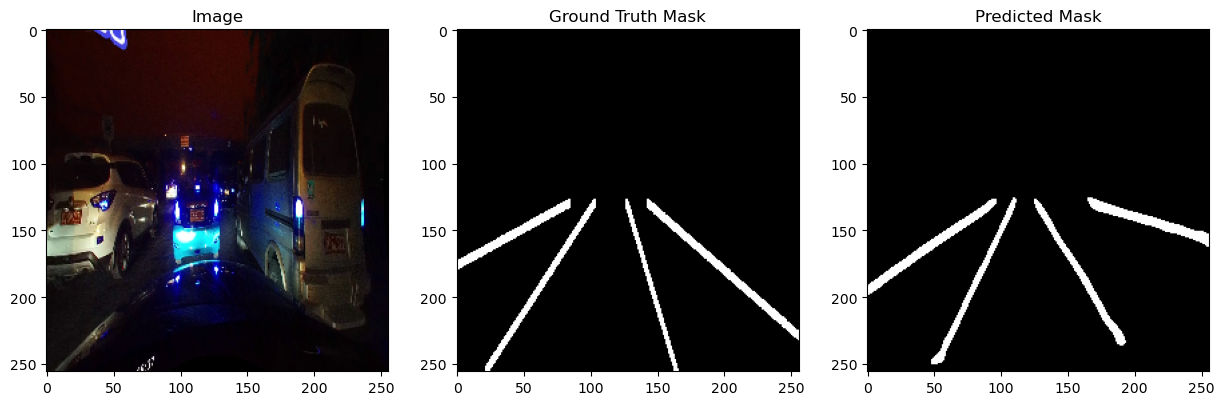

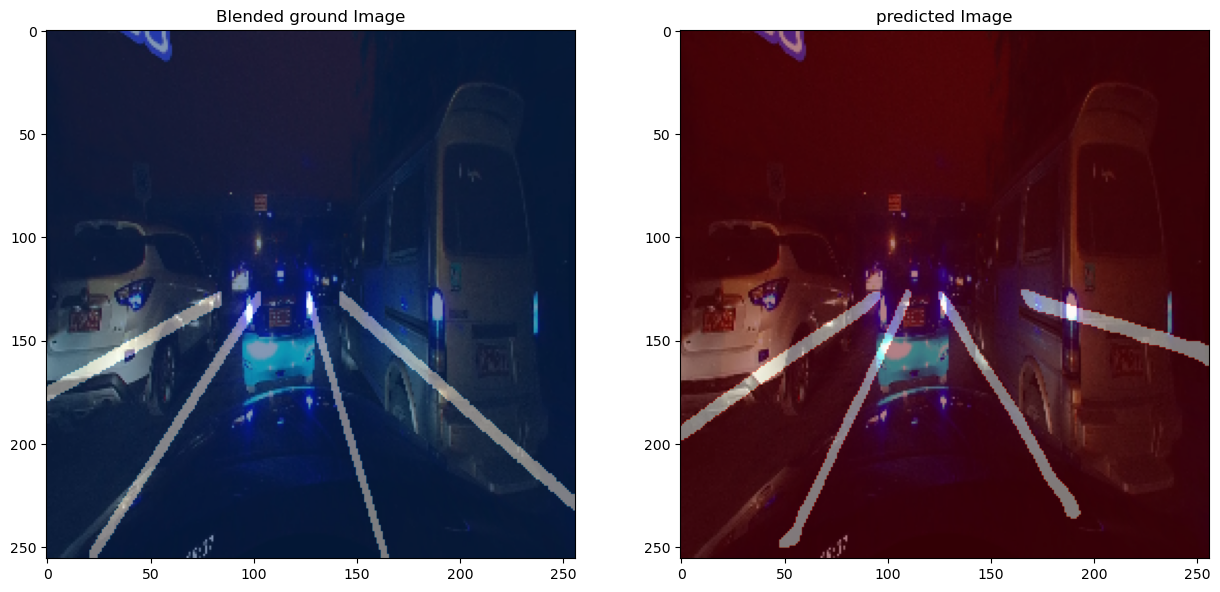

In [53]:
test_gen = gtest

# Get one batch of test data
#x_test, y_test = test_gen.next()

# Get the model prediction for the first image in the batch
pred = model.predict(x_test[31].reshape(1, 256, 256, 3))

# Convert the predicted mask to binary
pred_mask = (pred > 0.5).astype(np.uint8)[0]

# Visualize the image, ground truth mask, and predicted mask
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(x_test[0]*255)
axs[0].set_title('Image')

axs[1].imshow(y_test[0, :, :, 0], cmap='gray')
axs[1].set_title('Ground Truth Mask')

axs[2].imshow(pred_mask[:, :, 0], cmap='gray')
axs[2].set_title('Predicted Mask')

plt.show()


fig,axs = plt.subplots(1,2,figsize=(15,15))
axs[0].imshow(x_test[0]*255)
axs[0].set_title('Blended ground Image')
axs[0].imshow(util.invert(y_test[0, :, :, 0]), cmap='Blues',alpha=0.5)
#axs[0].set_title('Ground Truth Mask')

axs[1].imshow(x_test[0]*255)
axs[1].set_title('predicted Image')
axs[1].imshow(util.invert(pred_mask[ :, :, 0]), cmap='Reds',alpha=0.5)
plt.show()


In [50]:
from skimage import util

In [51]:
util.invert(y)

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

In [33]:
y_test[0, :, :, 0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [34]:
def inverse(a):
    a = np.flip((a==0),a)
    print(a)

In [45]:
y=y_test[0,:,:,0]

In [47]:
np.invert()

TypeError: ufunc 'invert' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [39]:
y^(y&1==y)

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

ValueError: 'Res' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

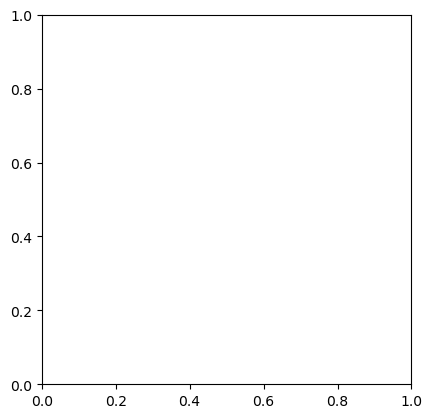

In [32]:

plt.imshow(y_test[0, :, :, 0],cmap="Res")

In [17]:
blended_preds = get_predictions(model,x_test)

AttributeError: 'numpy.ndarray' object has no attribute 'y'

In [ ]:
import matplotlib.pyplot as plt

# Plot the original image
plt.imshow(img)

# Plot the ground truth mask in red
plt.imshow(mask, cmap='Reds', alpha=0.5)

# Plot the predicted mask in green
plt.imshow(pred_mask, cmap='Greens', alpha=0.5)

# Plot the blended mask in blue
plt.imshow(blended_pred, cmap='Blues', alpha=0.5)

# Show the plot
plt.show()

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')

In [8]:
import sys
!{sys.executable} -m pip install keras


Defaulting to user installation because normal site-packages is not writeable


In [10]:
import keras as k

In [ ]:
keras.sum

In [ ]:
timg = x_test[1]

In [10]:
#physical_devices

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [12]:
#type(physical_devices[0])

tensorflow.python.eager.context.PhysicalDevice

In [14]:
#from tensorflow.python.eager.context import PhysicalDevice

In [3]:
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
tf.debugging.set_log_device_placement(True)

In [23]:
tf.config.set_visible_devices(PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'))

RuntimeError: Visible devices cannot be modified after being initialized

In [20]:
tf.keras.backend.clear_session()

In [16]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

def simple_model(input_shape):
    inputs = Input(shape=input_shape)

    # Encoder
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    # Decoder
    up1 = UpSampling2D(size=(2, 2))(pool2)
    conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1)
    up2 = UpSampling2D(size=(2, 2))(conv3)
    conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(up2)
    outputs = Conv2D(2, (1, 1), activation='softmax', padding='same')(conv4)

    model = Model(inputs=inputs, outputs=outputs)
    return model
model = simple_model((256,256,3))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
history = model.fit(gt,epochs=1,verbose=1,validation_data=gval)

 4/40 [==>...........................] - ETA: 27:02 - loss: 1.1639 - accuracy: 0.9744

In [1]:
import matplotlib.pyplot as plt
import cv2
# Load a test image
test_image = cv2.imread('D:/Data/driver_182_30frame/05312336_0004.MP4/00000.jpg')

# Generate lane predictions for the test image
test_image = cv2.resize(test_image, (256, 256))

# Generate lane predictions for the test image
test_pred = model.predict(test_image.reshape(1, 256, 256, 3))

ModuleNotFoundError: No module named 'matplotlib'

In [12]:
test_pred.shape

(1, 256, 256, 2)

In [20]:
test_points = binary_mask_to_points(test_pred)


(256, 2)